## Lab 3: Cleaning and Analysis of Books Dataset


# Table of Contents 
<ol start="1">
<li> Loading and Cleaning with Pandas</li>
<li> Asking Questions?  </li>
<li> Parsing and Completing the Dataframe  </li>
<li> Determining the Best Books  </li>
<li>Trends in Popularity of Genres </li>
</ol>


## Part 1: Loading and Cleaning with Pandas 
Read in the `goodreads.csv` file, examine the data, and do any necessary data cleaning. 

Here is a description of the columns (in order) present in this csv file:

```
rating: the average rating on a 1-5 scale achieved by the book
review_count: the number of Goodreads users who reviewed this book
isbn: the ISBN code for the book
booktype: an internal Goodreads identifier for the book
author_url: the Goodreads (relative) URL for the author of the book
year: the year the book was published
genre_urls: a string with '|' separated relative URLS of Goodreads genre pages
dir: a directory identifier internal to the scraping code
rating_count: the number of ratings for this book (this is different from the number of reviews)
name: the name of the book
```

Load the appropriate libraries

In [ ]:
#write your solution here
from google.colab import files
upload = files.upload()

Saving goodreads.csv to goodreads.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


### Cleaning: Reading in the data
We read in and clean the data from `goodreads.csv`.  Try directly loading the data from file and see what the dataframe look like. What's the problem with naively loading the data as is? You might want to open the CSV file in Excel or your favorite text editor to see how this dataset is formatted.

In [ ]:
#Read the data into a dataframe
#Inser your code
df = pd.read_csv('goodreads.csv')

#Examine the first couple of rows of the dataframe
####### 
#   Insert your code
####### 
df.head()



4.40 136455  0439023483  good_reads:book  \
0  4.41  16648  0439358078  good_reads:book   
1  3.56  85746  0316015849  good_reads:book   
2  4.23  47906  0061120081  good_reads:book   
3  4.23  34772  0679783261  good_reads:book   
4  4.25  12363  0446675539  good_reads:book   

  https://www.goodreads.com/author/show/153394.Suzanne_Collins    2008  \
0  https://www.goodreads.com/author/show/1077326....            2003.0   
1  https://www.goodreads.com/author/show/941441.S...            2005.0   
2  https://www.goodreads.com/author/show/1825.Har...            1960.0   
3  https://www.goodreads.com/author/show/1265.Jan...            1813.0   
4  https://www.goodreads.com/author/show/11081.Ma...            1936.0   

  /genres/young-adult|/genres/science-fiction|/genres/dystopia|/genres/fantasy|/genres/science-fiction|/genres/romance|/genres/adventure|/genres/book-club|/genres/young-adult|/genres/teen|/genres/apocalyptic|/genres/post-apocalyptic|/genres/action  \
0  /genres/fantasy|/genres/young-adult|/genres/fi...                                                                                                                                                                                                      
1  /genres/young-adult|/genres/fantasy|/genres/ro...                                                                                                                                                                                                      
2  /genres/classics|/genres/fiction|/genres/histo...                                                                                                                                                                                                      
3  /genres/classics|/genres/fiction|/genres/roman...                                                                                                                                                                                                      
4  /genres/classics|/genres/historical-fiction|/g...                                                                                                                                                                                                      

                 dir01/2767052-the-hunger-games.html  2958974  \
0  dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...  1284478   
1                          dir01/41865.Twilight.html  2579564   
2              dir01/2657.To_Kill_a_Mockingbird.html  2078123   
3                dir01/1885.Pride_and_Prejudice.html  1388992   
4                dir01/18405.Gone_with_the_Wind.html   645470   

             The Hunger Games (The Hunger Games, #1)  
0  Harry Potter and the Order of the Phoenix (Har...  
1                            Twilight (Twilight, #1)  
2                              To Kill a Mockingbird  
3                                Pride and Prejudice  
4                                 Gone with the Wind

Lets read the csv file with custom column descriptions specified in the problem statement.

In [ ]:
#Read the data into a dataframe specifying column names

df = pd.read_csv('goodreads.csv', names =[ 'rating','review_count', 'ISBN','booktype','author_url', 'year','genre_urls', 'dir','rating_count', 'name'])
df.head()
#Examine the first couple of rows of the dataframe
####### 
#   Insert your code
####### 


rating review_count        ISBN         booktype  \
0    4.40       136455  0439023483  good_reads:book   
1    4.41        16648  0439358078  good_reads:book   
2    3.56        85746  0316015849  good_reads:book   
3    4.23        47906  0061120081  good_reads:book   
4    4.23        34772  0679783261  good_reads:book   

                                          author_url    year  \
0  https://www.goodreads.com/author/show/153394.S...  2008.0   
1  https://www.goodreads.com/author/show/1077326....  2003.0   
2  https://www.goodreads.com/author/show/941441.S...  2005.0   
3  https://www.goodreads.com/author/show/1825.Har...  1960.0   
4  https://www.goodreads.com/author/show/1265.Jan...  1813.0   

                                          genre_urls  \
0  /genres/young-adult|/genres/science-fiction|/g...   
1  /genres/fantasy|/genres/young-adult|/genres/fi...   
2  /genres/young-adult|/genres/fantasy|/genres/ro...   
3  /genres/classics|/genres/fiction|/genres/histo...   
4  /genres/classics|/genres/fiction|/genres/roman...   

                                                 dir rating_count  \
0                dir01/2767052-the-hunger-games.html      2958974   
1  dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...      1284478   
2                          dir01/41865.Twilight.html      2579564   
3              dir01/2657.To_Kill_a_Mockingbird.html      2078123   
4                dir01/1885.Pride_and_Prejudice.html      1388992   

                                                name  
0            The Hunger Games (The Hunger Games, #1)  
1  Harry Potter and the Order of the Phoenix (Har...  
2                            Twilight (Twilight, #1)  
3                              To Kill a Mockingbird  
4                                Pride and Prejudice


### Cleaning: Examing the dataframe - quick checks

We should examine the dataframe to get a overall sense of the content.

In [ ]:
#Start by check the column data types
####### 
#   Insert your code
####### 
df.dtypes


rating          float64
review_count     object
ISBN             object
booktype         object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object

There are a couple more quick sanity checks to perform on the dataframe. 

In [ ]:
#Come up with a few other important properties of the dataframe to check
####### 
#   Insert your code
####### 
#we need to check for NaN values, empty strings...these kid of checks are kown as sanity checks.
df.isna().sum()


rating            2
review_count      0
ISBN            475
booktype          0
author_url        0
year              7
genre_urls       62
dir               0
rating_count      0
name              0
dtype: int64

**Question:** Was the data read correctly and values represented as we expected?

Answer : No.There are some nan values in few of the columns

### Cleaning: Examining the dataframe - a deeper look

Beyond performing checking some quick general properties of the data frame and looking at the first $n$ rows, we can dig a bit deeper into the values being stored. If you haven't already, check to see if there are any missing values in the data frame.

In [ ]:
#Get a sense of how many missing values there are in the dataframe.
####### 
#   Insert your code
####### 
df.isna().sum()

rating            2
review_count      0
ISBN            475
booktype          0
author_url        0
year              7
genre_urls       62
dir               0
rating_count      0
name              0
dtype: int64

In [ ]:
#Try to locate where the missing values occur
####### 
#   Insert your code
####### 
df[df.rating.isna() == True]


rating review_count  ISBN booktype author_url  year genre_urls  \
3643     NaN         None  None     None       None   NaN        NaN   
5282     NaN         None  None     None       None   NaN        NaN   

                                  dir rating_count  name  
3643  dir37/9658936-harry-potter.html         None  None  
5282     dir53/113138.The_Winner.html         None  None

In [ ]:
df[df.year.isna() == True]

rating review_count        ISBN         booktype  \
2442    4.23          526         NaN  good_reads:book   
2869    4.61            2         NaN  good_reads:book   
3643     NaN         None        None             None   
5282     NaN         None        None             None   
5572    3.71           35  8423336603  good_reads:book   
5658    4.32           44         NaN  good_reads:book   
5683    4.56          204         NaN  good_reads:book   

                                             author_url  year  \
2442  https://www.goodreads.com/author/show/623606.A...   NaN   
2869  https://www.goodreads.com/author/show/8182217....   NaN   
3643                                               None   NaN   
5282                                               None   NaN   
5572  https://www.goodreads.com/author/show/285658.E...   NaN   
5658  https://www.goodreads.com/author/show/25307.Ro...   NaN   
5683  https://www.goodreads.com/author/show/3097905....   NaN   

                                             genre_urls  \
2442  /genres/religion|/genres/islam|/genres/non-fic...   
2869                                                NaN   
3643                                                NaN   
5282                                                NaN   
5572                                    /genres/fiction   
5658  /genres/fantasy|/genres/fantasy|/genres/epic-f...   
5683  /genres/fantasy|/genres/young-adult|/genres/ro...   

                                                    dir rating_count  \
2442                       dir25/1301625.La_Tahzan.html         4134   
2869  dir29/22031070-my-death-experiences---a-preach...           23   
3643                    dir37/9658936-harry-potter.html         None   
5282                       dir53/113138.The_Winner.html         None   
5572  dir56/890680._rase_una_vez_el_amor_pero_tuve_q...          403   
5658  dir57/5533041-assassin-s-apprentice-royal-assa...         3850   
5683                  dir57/12474623-tiger-s-dream.html          895   

                                                   name  
2442                                          La Tahzan  
2869  My Death Experiences - A Preacherâs 18 Apoca...  
3643                                               None  
5282                                               None  
5572  Ãrase una vez el amor pero tuve que matarlo. ...  
5658  Assassin's Apprentice / Royal Assassin (Farsee...  
5683                 Tiger's Dream (The Tiger Saga, #5)

How does `pandas` or `numpy` handle missing values when we try to compute with data sets that include them?

dropna() which drops all the NaN, None values.


### Cleaning: Dealing with Missing Values
How should we interpret 'missing' or 'invalid' values in the data (hint: look at where these values occur)? One approach is to simply exclude them from the dataframe. Is this appropriate for all 'missing' or 'invalid' values? How would you drop these values from the dataframe (hint: is it possible to eliminate just a single entry in your dataframe? Should you eliminate an entire row? Or column?)?

In [ ]:
df.shape

(6000, 10)

In [ ]:
#Treat the missing or invalid values in your dataframe
####### 
#   Insert your code
####### 
df.dropna(subset = ['year', 'rating'], inplace = True)

In [ ]:
df.shape

(5993, 10)

Ok so we have done some cleaning. Is it enough? 

In [ ]:
#Check the column data types again
####### 
#   Insert your code
####### 
df.dtypes


rating          float64
review_count     object
ISBN             object
booktype         object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object

Notice the float has not yet changed.
Ok so lets fix those types. If the type conversion fails, we now know we have further problems.

In [ ]:
#Convert rating_count, review_count and year to int 
#######
# .Insert your code
#######
df.review_count = df.review_count.astype('int')
df.dtypes


rating          float64
review_count      int64
ISBN             object
booktype         object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object

In [ ]:
df.rating_count = df.rating_count.astype('int')
df.dtypes

rating          float64
review_count      int64
ISBN             object
booktype         object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count      int64
name             object
dtype: object

In [ ]:
df.year = df.year.astype('int')
df.dtypes

rating          float64
review_count      int64
ISBN             object
booktype         object
author_url       object
year              int64
genre_urls       object
dir              object
rating_count      int64
name             object
dtype: object

Final check

Some of the other colums that should be strings have NaN. 

In [ ]:
#Insert Your code here
df.dtypes


rating          float64
review_count      int64
ISBN             object
booktype         object
author_url       object
year              int64
genre_urls       object
dir              object
rating_count      int64
name             object
dtype: object

##  Part 2: Asking Questions
Think of few questions we want to ask and then examine the data and decide if the dataframe contains what you need to address these questions. 

**Example:** Which are the highest rated books? To determine this, you'll only need the data in two columns: `name` and `rating`. The task will be to sort these two columns by the value in `rating`.


Book with highest rating.
Book name, author name

In [ ]:
df.isna().sum()

rating            0
review_count      0
ISBN            471
booktype          0
author_url        0
year              0
genre_urls       59
dir               0
rating_count      0
name              0
dtype: int64

---

In [ ]:
max = df.review_count.max()

##  Part 3: Parsing and Completing the Data Frame 

We will need author and genre to proceed! Parse the `author` column from the author_url and `genres` column from the genre_urls. Keep the `genres` column as a string separated by '|'.

Hint: Use panda's `map` to assign new columns to the dataframe.  


---

Examine an example `author_url` and reason about which sequence of string operations must be performed in order to isolate the author's name.

In [ ]:
#Get the first author_url
df.head()
url = df.author_url[0]
url


'https://www.goodreads.com/author/show/153394.Suzanne_Collins'

In [ ]:
#Test out some string operations to isolate the author name
####### 
#   Insert your code
#######
author = url.split('.')[-1]
author

'Suzanne_Collins'

In [ ]:
#Write a function that accepts an author url and returns the author's name based on your experimentation above
    ####### 
    #   Insert your code
    ####### 
def get_author(url):
    author = url.split('.')[-1]
    return author
#Apply the get_author function to the 'author_url' column using '.map' 
#and add a new column 'author' to store the names
df['author'] = df.author_url.map(get_author)
df.head()



rating  review_count        ISBN         booktype  \
0    4.40        136455  0439023483  good_reads:book   
1    4.41         16648  0439358078  good_reads:book   
2    3.56         85746  0316015849  good_reads:book   
3    4.23         47906  0061120081  good_reads:book   
4    4.23         34772  0679783261  good_reads:book   

                                          author_url  year  \
0  https://www.goodreads.com/author/show/153394.S...  2008   
1  https://www.goodreads.com/author/show/1077326....  2003   
2  https://www.goodreads.com/author/show/941441.S...  2005   
3  https://www.goodreads.com/author/show/1825.Har...  1960   
4  https://www.goodreads.com/author/show/1265.Jan...  1813   

                                          genre_urls  \
0  /genres/young-adult|/genres/science-fiction|/g...   
1  /genres/fantasy|/genres/young-adult|/genres/fi...   
2  /genres/young-adult|/genres/fantasy|/genres/ro...   
3  /genres/classics|/genres/fiction|/genres/histo...   
4  /genres/classics|/genres/fiction|/genres/roman...   

                                                 dir  rating_count  \
0                dir01/2767052-the-hunger-games.html       2958974   
1  dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...       1284478   
2                          dir01/41865.Twilight.html       2579564   
3              dir01/2657.To_Kill_a_Mockingbird.html       2078123   
4                dir01/1885.Pride_and_Prejudice.html       1388992   

                                                name           author  
0            The Hunger Games (The Hunger Games, #1)  Suzanne_Collins  
1  Harry Potter and the Order of the Phoenix (Har...      J_K_Rowling  
2                            Twilight (Twilight, #1)  Stephenie_Meyer  
3                              To Kill a Mockingbird       Harper_Lee  
4                                Pride and Prejudice      Jane_Austen

Now parse out the genres from `genre_url`.  Like with the authors, we'll assign a new `genres` column to the dataframe.

This is a little more complicated because there be more than one genre.

In [ ]:
newdf = df.dropna(subset=['genre_urls'])
newdf.shape

(5934, 11)

In [ ]:
#Get first genre_url
url_genre = newdf.genre_urls[0]
url_genre

'/genres/young-adult|/genres/science-fiction|/genres/dystopia|/genres/fantasy|/genres/science-fiction|/genres/romance|/genres/adventure|/genres/book-club|/genres/young-adult|/genres/teen|/genres/apocalyptic|/genres/post-apocalyptic|/genres/action'

In [ ]:
#Test out some string operations to isolate the genres
####### 
#   Insert your code
#######

genres = url_genre.split("/genres/")[1:]
genres


['young-adult|',
 'science-fiction|',
 'dystopia|',
 'fantasy|',
 'science-fiction|',
 'romance|',
 'adventure|',
 'book-club|',
 'young-adult|',
 'teen|',
 'apocalyptic|',
 'post-apocalyptic|',
 'action']

In [ ]:
#List comprehension rather than loop
newgenres = [genre.replace("|","") for genre in genres]
newgenres

['young-adult',
 'science-fiction',
 'dystopia',
 'fantasy',
 'science-fiction',
 'romance',
 'adventure',
 'book-club',
 'young-adult',
 'teen',
 'apocalyptic',
 'post-apocalyptic',
 'action']

In [ ]:
#storing it in string format.
genres = "|".join(newgenres)
genres

'young-adult|science-fiction|dystopia|fantasy|science-fiction|romance|adventure|book-club|young-adult|teen|apocalyptic|post-apocalyptic|action'

In [ ]:
#Write a function that accepts a genre url and returns the genre name based on your experimentation above
    ####### 
    #   Insert your code
    ####### 
    # df['genres'] = df.genre_urls.map(get_genre)
# df.head
def get_genre(url):
        genres = url.split("/genres/")[1:]
        newgenre = [genre.replace("|","") for genre in genres]
        genres = "|".join(newgenre)
        return genres


newdf['Genres'] = newdf.genre_urls.map(get_genre)
newdf.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


rating  review_count        ISBN         booktype  \
0    4.40        136455  0439023483  good_reads:book   
1    4.41         16648  0439358078  good_reads:book   
2    3.56         85746  0316015849  good_reads:book   
3    4.23         47906  0061120081  good_reads:book   
4    4.23         34772  0679783261  good_reads:book   

                                          author_url  year  \
0  https://www.goodreads.com/author/show/153394.S...  2008   
1  https://www.goodreads.com/author/show/1077326....  2003   
2  https://www.goodreads.com/author/show/941441.S...  2005   
3  https://www.goodreads.com/author/show/1825.Har...  1960   
4  https://www.goodreads.com/author/show/1265.Jan...  1813   

                                          genre_urls  \
0  /genres/young-adult|/genres/science-fiction|/g...   
1  /genres/fantasy|/genres/young-adult|/genres/fi...   
2  /genres/young-adult|/genres/fantasy|/genres/ro...   
3  /genres/classics|/genres/fiction|/genres/histo...   
4  /genres/classics|/genres/fiction|/genres/roman...   

                                                 dir  rating_count  \
0                dir01/2767052-the-hunger-games.html       2958974   
1  dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...       1284478   
2                          dir01/41865.Twilight.html       2579564   
3              dir01/2657.To_Kill_a_Mockingbird.html       2078123   
4                dir01/1885.Pride_and_Prejudice.html       1388992   

                                                name           author  \
0            The Hunger Games (The Hunger Games, #1)  Suzanne_Collins   
1  Harry Potter and the Order of the Phoenix (Har...      J_K_Rowling   
2                            Twilight (Twilight, #1)  Stephenie_Meyer   
3                              To Kill a Mockingbird       Harper_Lee   
4                                Pride and Prejudice      Jane_Austen   

                                              Genres  
0  young-adult|science-fiction|dystopia|fantasy|s...  
1  fantasy|young-adult|fiction|fantasy|magic|chil...  
2  young-adult|fantasy|romance|paranormal|vampire...  
3  classics|fiction|historical-fiction|academic|s...  
4  classics|fiction|romance|historical-fiction|li...

---

4. EDA (Exploratory Data Analysis)



4.1 Univariate(One Variable)


## Part 4:  Determining the Best Books 

This is an example of an analysis of the "grouped property" type.

Think of some reasonable definitions of what it could mean to be a "best book."
 

---

For example, we can determine the "best book" by year! Determine the best books in each year from 2000

In [ ]:
#Deterime best book each year based on rating. 
df.dropna(inplace = True)
df.shape


(5496, 11)

In [ ]:
best_bookdf = df.groupby('year', sort = False)
best_bookdf.get_group(2000)

rating  review_count        ISBN         booktype  \
140     3.44         43943  0143038419  good_reads:book   
201     4.23          3896  0440238609  good_reads:book   
222     4.53         15256  055357342X  good_reads:book   
310     4.16          7362  0312282990  good_reads:book   
345     3.73          8678  0439488400  good_reads:book   
...      ...           ...         ...              ...   
5857    3.95           489  2253152854  good_reads:book   
5907    4.00           171  0743439740  good_reads:book   
5923    4.11           847  0224063979  good_reads:book   
5931    3.32           309  0060882034  good_reads:book   
5971    4.24            72  0413748308  good_reads:book   

                                             author_url  year  \
140   https://www.goodreads.com/author/show/11679.El...  2000   
201   https://www.goodreads.com/author/show/3618.Phi...  2000   
222   https://www.goodreads.com/author/show/346732.G...  2000   
310   https://www.goodreads.com/author/show/2715.Mic...  2000   
345   https://www.goodreads.com/author/show/12696.Je...  2000   
...                                                 ...   ...   
5857  https://www.goodreads.com/author/show/3524.Joy...  2000   
5907  https://www.goodreads.com/author/show/9678.Ann...  2000   
5923  https://www.goodreads.com/author/show/5112.Chr...  2000   
5931  https://www.goodreads.com/author/show/12180.Fr...  2000   
5971  https://www.goodreads.com/author/show/29185.Sa...  2000   

                                             genre_urls  \
140   /genres/non-fiction|/genres/autobiography|/gen...   
201   /genres/fantasy|/genres/young-adult|/genres/sc...   
222   /genres/fantasy|/genres/fiction|/genres/fantas...   
310   /genres/fiction|/genres/historical-fiction|/ge...   
345   /genres/young-adult|/genres/realistic-fiction|...   
...                                                 ...   
5857  /genres/fiction|/genres/historical-fiction|/ge...   
5907  /genres/crime|/genres/true-crime|/genres/non-f...   
5923  /genres/sequential-art|/genres/graphic-novels|...   
5931  /genres/fiction|/genres/novels|/genres/contemp...   
5971  /genres/plays|/genres/drama|/genres/plays|/gen...   

                                                    dir  rating_count  \
140                      dir02/19501.Eat_Pray_Love.html        859742   
201                 dir03/18116.His_Dark_Materials.html         77343   
222                  dir03/62291.A_Storm_of_Swords.html        327992   
310   dir04/3985.The_Amazing_Adventures_of_Kavalier_...        117620   
345                           dir04/22232.Stargirl.html        172010   
...                                                 ...           ...   
5857                            dir59/15975.Blonde.html          5158   
5907            dir60/266346.Every_Breath_You_Take.html          4154   
5923  dir60/34072.Jimmy_Corrigan_the_Smartest_Kid_on...         14679   
5931                        dir60/39937.Blue_Angel.html          2374   
5971                   dir60/146548.4_48_Psychosis.html          1016   

                                                name             author  
140                                  Eat, Pray, Love  Elizabeth_Gilbert  
201     His Dark Materials (His Dark Materials #1-3)     Philip_Pullman  
222   A Storm of Swords (A Song of Ice and Fire, #3)  George_R_R_Martin  
310        The Amazing Adventures of Kavalier & Clay     Michael_Chabon  
345                          Stargirl (Stargirl, #1)     Jerry_Spinelli  
...                                              ...                ...  
5857                                          Blonde  Joyce_Carol_Oates  
5907                           Every Breath You Take           Ann_Rule  
5923       Jimmy Corrigan, the Smartest Kid on Earth         Chris_Ware  
5931                                      Blue Angel     Francine_Prose  
5971                                  4.48 Psychosis         Sarah_Kane  

[121 rows x 11 columns]

In [ ]:
best_bookdf.size()

year
2008    241
2003    162
2005    196
1960     17
1813      1
       ... 
1391      1
1621      1
1589      1
1106      1
1140      1
Length: 290, dtype: int64

In [ ]:
best_bookdf.groups

{2008: [0, 127, 138, 188, 198, 289, 309, 337, 343, 368, 380, 383, 422, 434, 459, 471, 478, 479, 483, 501, 544, 584, 653, 657, 663, 698, 730, 738, 751, 763, 805, 825, 840, 847, 862, 902, 937, 941, 943, 959, 1005, 1024, 1025, 1057, 1061, 1090, 1095, 1137, 1142, 1150, 1172, 1262, 1401, 1414, 1420, 1425, 1472, 1531, 1545, 1568, 1585, 1598, 1602, 1615, 1635, 1778, 1808, 1832, 1861, 1862, 1890, 1901, 1904, 1905, 1918, 1988, 2007, 2008, 2040, 2047, 2049, 2058, 2083, 2088, 2136, 2149, 2158, 2164, 2189, 2193, 2237, 2288, 2293, 2302, 2321, 2348, 2363, 2395, 2416, 2423, ...], 2003: [1, 11, 113, 115, 238, 286, 297, 376, 435, 442, 470, 555, 574, 590, 630, 640, 690, 757, 784, 811, 856, 898, 987, 1044, 1146, 1213, 1221, 1240, 1312, 1356, 1363, 1380, 1415, 1470, 1503, 1520, 1564, 1619, 1675, 1780, 1817, 1859, 1883, 1910, 1920, 1955, 1983, 2031, 2066, 2105, 2131, 2226, 2252, 2254, 2327, 2356, 2396, 2447, 2453, 2457, 2462, 2569, 2571, 2603, 2604, 2661, 2666, 2671, 2702, 2809, 2827, 2856, 2885, 2899, 296

In [ ]:
for key, valuedf in best_bookdf:
  valuedf = valuedf[valuedf['rating'] == valuedf.rating.max()]
  print(valuedf.name, valuedf.year, valuedf.rating)

4084    The Absolute Sandman, Vol. 4
Name: name, dtype: object 4084    2008
Name: year, dtype: int64 4084    4.75
Name: rating, dtype: float64
4629    The Complete Far Side, 1980-1994
Name: name, dtype: object 4629    2003
Name: year, dtype: int64 4629    4.66
Name: rating, dtype: float64
249    The Complete Calvin and Hobbes
Name: name, dtype: object 249    2005
Name: year, dtype: int64 249    4.8
Name: rating, dtype: float64
5941    The Annotated Alice
Name: name, dtype: object 5941    1960
Name: year, dtype: int64 5941    4.48
Name: rating, dtype: float64
4    Pride and Prejudice
Name: name, dtype: object 4    1813
Name: year, dtype: int64 4    4.23
Name: rating, dtype: float64
2045    Three Comrades
Name: name, dtype: object 2045    1936
Name: year, dtype: int64 2045    4.48
Name: rating, dtype: float64
5925    Paroles
Name: name, dtype: object 5925    1949
Name: year, dtype: int64 5925    4.27
Name: rating, dtype: float64
4666    The Feynman Lectures on Physics
Name: name, dtype: 

In [ ]:
df.sort_values(by = ['rating'],ascending = False)[:5]

rating  review_count        ISBN         booktype  \
3712    4.93             7  1781843457  good_reads:book   
911     4.85            26  1491732954  good_reads:book   
249     4.80           644  0740748475  good_reads:book   
2630    4.80            46  1475124511  good_reads:book   
5657    4.80             8  1469908530  good_reads:book   

                                             author_url  year  \
3712  https://www.goodreads.com/author/show/5014793....  2013   
911   https://www.goodreads.com/author/show/8189303....  2014   
249   https://www.goodreads.com/author/show/13778.Bi...  2005   
2630  https://www.goodreads.com/author/show/5461236....  2012   
5657  https://www.goodreads.com/author/show/4695431....  2012   

                                             genre_urls  \
3712  /genres/fantasy|/genres/romance|/genres/suspen...   
911                                     /genres/fiction   
249   /genres/sequential-art|/genres/comics|/genres/...   
2630                /genres/non-fiction|/genres/animals   
5657                                    /genres/fantasy   

                                                    dir  rating_count  \
3712                    dir38/18080358-blade-heart.html            15   
911              dir10/22242097-honor-and-polygamy.html            97   
249     dir03/24812.The_Complete_Calvin_and_Hobbes.html         22674   
2630  dir27/16186085-if-i-should-die-before-my-dog--...            81   
5657  dir57/15734769-myrtle-mae-and-the-mirror-in-th...            10   

                                                   name          author  
3712                                        Blade Heart     Chris_Lange  
911                                  Honor and Polygamy     Omar_Farhad  
249                      The Complete Calvin and Hobbes  Bill_Watterson  
2630                   If I Should Die Before My Dog --    Joe_Connolly  
5657  Myrtle Mae and the Mirror in the Attic (The Ma...        Joe_Egly

In [ ]:
best_bookdf.max()

rating  review_count        ISBN         booktype  \
year                                                      
2008    4.75        136455  9773513912  good_reads:book   
2003    4.66         34959  905759305X  good_reads:book   
2005    4.80         85746  9896370974  good_reads:book   
1960    4.48         47906  9707311169  good_reads:book   
1813    4.23         34772  0679783261  good_reads:book   
...      ...           ...         ...              ...   
1391    3.86           427  0141183721  good_reads:book   
1621    4.21            83  0940322668  good_reads:book   
1589    3.70           667  0671722921  good_reads:book   
1106    3.98           134  0192803735  good_reads:book   
1140    3.42           118  8489163936  good_reads:book   

                                             author_url  \
year                                                      
2008  https://www.goodreads.com/author/show/9987.Phi...   
2003  https://www.goodreads.com/author/show/9987.Phi...   
2005  https://www.goodreads.com/author/show/9987.Phi...   
1960  https://www.goodreads.com/author/show/8164.Lew...   
1813  https://www.goodreads.com/author/show/1265.Jan...   
...                                                 ...   
1391  https://www.goodreads.com/author/show/3706.Geo...   
1621  https://www.goodreads.com/author/show/9796.Rob...   
1589  https://www.goodreads.com/author/show/947.Will...   
1106  https://www.goodreads.com/author/show/5158478....   
1140  https://www.goodreads.com/author/show/5158478....   

                                             genre_urls  \
year                                                      
2008  /genres/young-adult|/genres/womens-fiction|/ge...   
2003  /genres/young-adult|/genres/womens-fiction|/ge...   
2005  /genres/young-adult|/genres/womens-fiction|/ge...   
1960  /genres/young-adult|/genres/fiction|/genres/hi...   
1813  /genres/classics|/genres/fiction|/genres/roman...   
...                                                 ...   
1391  /genres/fiction|/genres/classics|/genres/liter...   
1621  /genres/psychology|/genres/philosophy|/genres/...   
1589  /genres/plays|/genres/classics|/genres/drama|/...   
1106  /genres/fantasy|/genres/mythology|/genres/clas...   
1140  /genres/poetry|/genres/classics|/genres/europe...   

                                              dir  rating_count  \
year                                                              
2008                   dir60/2177563.Madness.html       2958974   
2003        dir60/231.I_am_Charlotte_Simmons.html       1284478   
2005          dir60/78508.The_River_of_Doubt.html       2579564   
1960         dir60/211953.Mistress_of_Mellyn.html       2078123   
1813          dir01/1885.Pride_and_Prejudice.html       1388992   
...                                           ...           ...   
1391   dir56/9648.Keep_the_Aspidistra_Flying.html          7029   
1621  dir56/557658.The_Anatomy_of_Melancholy.html           720   
1589            dir58/72978.Titus_Andronicus.html         13070   
1106                    dir58/75586.The_T_in.html          1988   
1140            dir59/73419.Poema_de_M_o_Cid.html          3463   

                            name               author  
year                                                   
2008              ÙÙØªÙØ¨ÙØ§                    _  
2003     Y (Y: The Last Man, #1)       William_Gibson  
2005                       Zorro          Zadie_Smith  
1960  Whip Hand (Sid Halley, #2)         Walker_Percy  
1813         Pride and Prejudice          Jane_Austen  
...                          ...                  ...  
1391  Keep the Aspidistra Flying        George_Orwell  
1621   The Anatomy of Melancholy        Robert_Burton  
1589            Titus Andronicus  William_Shakespeare  
1106                   The TÃ¡in            Anonymous  
1140           Poema de MÃ­o Cid            Anonymous  

[290 rows x 10 columns]

In [ ]:
best_bookdf.mean()

rating  review_count  rating_count
year                                      
2008  4.012656   3314.987552  5.657339e+04
2003  3.982654   2308.518519  5.820168e+04
2005  3.989592   3579.627551  7.159961e+04
1960  4.016471   4013.294118  1.770642e+05
1813  4.230000  34772.000000  1.388992e+06
...        ...           ...           ...
1391  3.860000    427.000000  7.029000e+03
1621  4.210000     83.000000  7.200000e+02
1589  3.700000    667.000000  1.307000e+04
1106  3.980000    134.000000  1.988000e+03
1140  3.420000    118.000000  3.463000e+03

[290 rows x 3 columns]

In [ ]:
best_bookdf['rating'].mean()

year
2008    4.012656
2003    3.982654
2005    3.989592
1960    4.016471
1813    4.230000
          ...   
1391    3.860000
1621    4.210000
1589    3.700000
1106    3.980000
1140    3.420000
Name: rating, Length: 290, dtype: float64

Try this for few other definitions of the "best book" using `.groupby`.

## Part 5:  Trends in Popularity of Genres 

This is an example of an analysis of the "grouped property" type.

There are a lot of questions you could ask about genres.
* Which genre is currently the most popular?
* Better, based on our data, what draw conclusions can you draw about the time evolution of the popularity of each genre?


---

First we need to find the distinct genres in the dataframe. 

To do this, notice that each string is a pipe (|) separated list of genres. For each string, we ask if the genre is in that pipe separated list.  If it is, we return True, else False

**Hint: remember that python sets have unique (non-repeating) items.**

What happens if we add a column to the dataframe for each genre? 

Is this way of representing genre efficient? Allows for easy computation and visualization?

Are there other ways to represent genre information in the dataframe that allow for each visualization?

In [ ]:
#Get the unique generes contained in the dataframe
genre_set = set()
for genre in newdf.Genres:
  list_genre = genre.split("|")
  genre_set.update(list_genre)
  
len(genre_set)


537

In [ ]:
#Add a column for each genre 
#for genre in genre_set:
  #for row in newdf.genres:
    #newdf[genre] = genre in row.split("|") 

for genre in genre_set:
  newdf[genre] = [genre in row.split("|") for row in newdf.Genres]
  newdf.head()
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
newdf.shape

(5934, 549)

In [ ]:
genredf = newdf[list(genre_set)]
genredf.head()

prehistory  plays    fae  english-literature  vampires  social  \
0       False  False  False               False     False   False   
1       False  False  False               False     False   False   
2       False  False  False               False      True   False   
3       False  False  False               False     False   False   
4       False  False  False               False     False   False   

   art-history  geography  new-weird  turkish  ...  activism    zen  \
0        False      False      False    False  ...     False  False   
1        False      False      False    False  ...     False  False   
2        False      False      False    False  ...     False  False   
3        False      False      False    False  ...     False  False   
4        False      False      False    False  ...     False  False   

   scandinavian-literature  cycling  american-fiction  paranormal  \
0                    False    False             False       False   
1                    False    False             False       False   
2                    False    False             False        True   
3                    False    False             False       False   
4                    False    False             False       False   

   architecture  beauty-and-the-beast  hinduism  death  
0         False                 False     False  False  
1         False                 False     False  False  
2         False                 False     False  False  
3         False                 False     False  False  
4         False                 False     False  False  

[5 rows x 537 columns]

In [ ]:
result = genredf.sum()
result = result.sort_values(ascending = False)
x = sorted(genre_set)[:20]
y = result[:20]

In [ ]:
import matplotlib.pyplot as plt

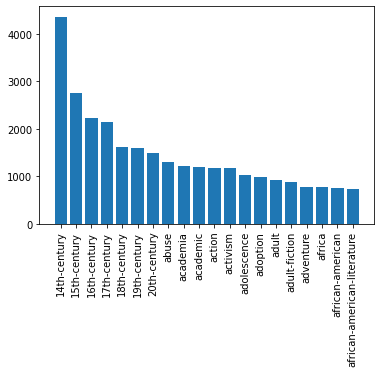

In [ ]:
plt.bar(x,y)
plt.xticks(rotation = 90)
plt.show()